# Linear Regression

## 1. Model Definition (The Hypothesis)

Linear regression attempts to model the relationship between a dependent variable ($Y$) and one or more independent variables ($X$) by fitting a linear equation to observed data.

### A. Scalar Form (1D Data - "Line of Best Fit")
$$y = wx + b$$

* **$w$ (Weight/Slope):** Determines the angle of the line.
* **$b$ (Bias/Intercept):** Determines where the line crosses the Y-axis.

### B. Matrix Form (Multidimensional Data)
$$F(X) = X \times W$$

**Cost Function (with L2 Regularization/Ridge):**
$$J = || F(X) - Y ||_2^2 + \lambda ||W||_2^2$$

* $X_{n \times k}$: Input Data (n samples, k features)
* $W$: Weights vector
* $\lambda$: Regularization term (prevents overfitting)

---

## 2. Prediction (Forward Pass)

For a new input $x$, the model predicts:
$$y_{pred} = wx + b$$

**Example:**
* Weights: $w = 2, b = 1$
* Input: $x = 4$
* Result: $y = 2(4) + 1 = 9$

---

## 3. Cost Function (The "Scorecard")

We need a mathematical way to measure "how wrong" the line is. We use **MSE (Mean Squared Error)**.

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (y_{pred}^{(i)} - y^{(i)})^2$$

* **Why Square it?** To eliminate negative signs and penalize large errors more heavily.
* **Goal:** Minimize $J$.



---

## 4. Optimization: Gradient Descent

Used for **large datasets**. It is an iterative algorithm that tweaks weights to minimize the Cost.

**The Update Rule:**
Repeat until convergence:
$$w_{new} = w_{old} - \alpha \frac{\partial J}{\partial w}$$
$$b_{new} = b_{old} - \alpha \frac{\partial J}{\partial b}$$

* **$\alpha$ (Learning Rate):** Controls step size.
    * Too small: Slow convergence.
    * Too large: Overshoots/Diverges.
* **Gradient ($\frac{\partial J}{\partial w}$):** The direction of the steepest ascent (we go opposite).



---

## 5. Optimization: The Normal Equation (Alternative)

Used for **small datasets**. We can solve for $W$ mathematically in one step without loops.

$$W = (X^T X)^{-1} X^T Y$$

| Gradient Descent | Normal Equation |
| :--- | :--- |
| Needs Learning Rate ($\alpha$) | No $\alpha$ needed |
| Iterative (Many steps) | Exact solution (One step) |
| $O(kn^2)$ - Good for large $n$ | $O(n^3)$ - Slow if $n > 10,000$ |

---

## 6. Evaluation Metrics (How good is it?)

The Cost Function is for the machine. These metrics are for humans to report performance.

### A. R-Squared ($R^2$)
Measures "Goodness of Fit."
* **Range:** 0 to 1.
* **Interpretation:** 0.80 means "The model explains 80% of the variance in the target variable."

### B. RMSE (Root Mean Squared Error)
$$RMSE = \sqrt{\frac{1}{m} \sum (y_{pred} - y)^2}$$
* **Interpretation:** Tells you the error in the actual units of $Y$.
* *Example:* If predicting House Prices, an RMSE of 5000 means the model is usually off by about \$5,000.

---

## 7. Critical Assumptions

Linear Regression only works reliably if these assumptions hold true:

1.  **Linearity:** The relationship between $X$ and $Y$ is linear.
2.  **Independence:** Observations are independent of each other.
3.  **Homoscedasticity:** The variance of error terms is constant (the "noise" is consistent across all values of $X$).
4.  **Normality:** The residuals (errors) are normally distributed.



---

## 8. Pre-processing Requirement: Feature Scaling

**Crucial for Gradient Descent:**
Because Gradient Descent is sensitive to the scale of input features, you must normalize data ( using **StandardScaler** or **MinMaxScaler**).
* **Goal:** Scale all features to a similar range ( -1 to 1) to prevent the gradient from oscillating.

---

## 9. When to Use (and When Not to Use)

###  When to Use
1.  **Baseline:** Always start here. It's fast and simple.
2.  **Explainability:** When you need to explain *exactly* how each feature affects the result ( Bank Loans).
3.  **Linear Data:** When the relationship is truly a straight line.
4.  **Sparse Data:** When you don't have enough data for Neural Networks.

###  When NOT to Use
1.  **Non-Linear Data:** If data is curved, this model will fail.
2.  **Outliers:** One bad point can ruin the whole model.
3.  **Complex Inputs:** Cannot handle Images, Audio, or Text efficiently.

---

## 10. Common Interview Questions

**Q1: Why do we square the error in MSE?**
> To remove negative signs and punish larger errors more severely than small ones.

**Q2: What happens if the Learning Rate is too high?**
> The model overshoots the minimum and may diverge (error increases to infinity).

**Q3: Can R-Squared be negative?**
> Yes. If the model is worse than a simple horizontal line (mean), $R^2$ is negative.

**Q4: Explain L1 vs L2 Regularization.**
> **L1 (Lasso):** Shrinks weights to zero (feature selection).
> **L2 (Ridge):** Shrinks weights *near* zero (prevents overfitting).

---

## 11. Advanced: Deriving the Gradient (Step-by-Step)

*This is the mathematical proof for the update rule.*

**1. The Cost Function:**
$$J = \frac{1}{2m} \sum_{i=1}^{m} (wx^{(i)} + b - y^{(i)})^2$$

**2. The Chain Rule:**
We want $\frac{\partial J}{\partial w}$. Let $u = (wx + b - y)$. Then $J = u^2$.
$$\frac{\partial J}{\partial w} = \frac{\partial J}{\partial u} \times \frac{\partial u}{\partial w}$$

**3. The Derivatives:**
* Outer derivative ($\partial J / \partial u$): $2(wx + b - y)$
* Inner derivative ($\partial u / \partial w$): $x$

**4. Combine them:**
The $2$ from the derivative cancels out the $\frac{1}{2}$ in the cost function.
$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum (wx^{(i)} + b - y^{(i)}) \cdot x^{(i)}$$

**Final Result (The Gradient):**
$$\text{Gradient} = \text{Average}(\text{Error} \times \text{Input})$$

In [1]:
import numpy as np
import random
n, k, p=100, 8, 3 
X=np.random.random([n,k])
W=np.random.random([k,p])
Y=np.random.random([n,p])
max_itr=1000
alpha=0.0001
Lambda=0.01

Gradient is as follows:
$$ X^T 2 E + \lambda 2 W$$

In [ ]:
# F(x)= w[0]*x + w[1]
def F(X, W):
    return np.matmul(X,W)

def cost(Y_est, Y, W, Lambda):
    E=Y_est-Y
    return E, np.linalg.norm(E,2)+ Lambda * np.linalg.norm(W,2)

def gradient(E,X, W, Lambda):
    return 2* np.matmul(X.T, E) + Lambda* 2* W

In [3]:
def fit(W, X, Y, alpha, Lambda, max_itr):
    for i in range(max_itr):
        
        Y_est=F(X,W)
        E, c= cost(Y_est, Y, W, Lambda)
        Wg=gradient(E, X, W, Lambda)
        W=W - alpha * Wg
        if i%100==0:
            print(c)
        
    return W

In [4]:
X=np.concatenate( (X, np.ones((n,1))), axis=1 ) 
W=np.concatenate( (W, np.random.random((1,p)) ), axis=0 )

W = fit(W, X, Y, alpha, Lambda, max_itr)

38.52639475771787
4.145642403134215
3.751959303273704
3.511235186734596
3.3682486314119817
3.2825115425951434
3.2292479503459073
3.194759210915952
3.171618948485405
3.155612646424403


## Linear Regression with Gradient Descent

SIMPLE LINEAR REGRESSION MODEL
Equation: y = 2.6289 + 1.3840 * x
Intercept (b0): 2.6289
Slope (b1): 1.3840
R-squared: 0.8343

Predictions:
  x =   0.0 -> y =  2.63
  x =   5.0 -> y =  9.55
  x =  10.0 -> y = 16.47
  x =  15.0 -> y = 23.39


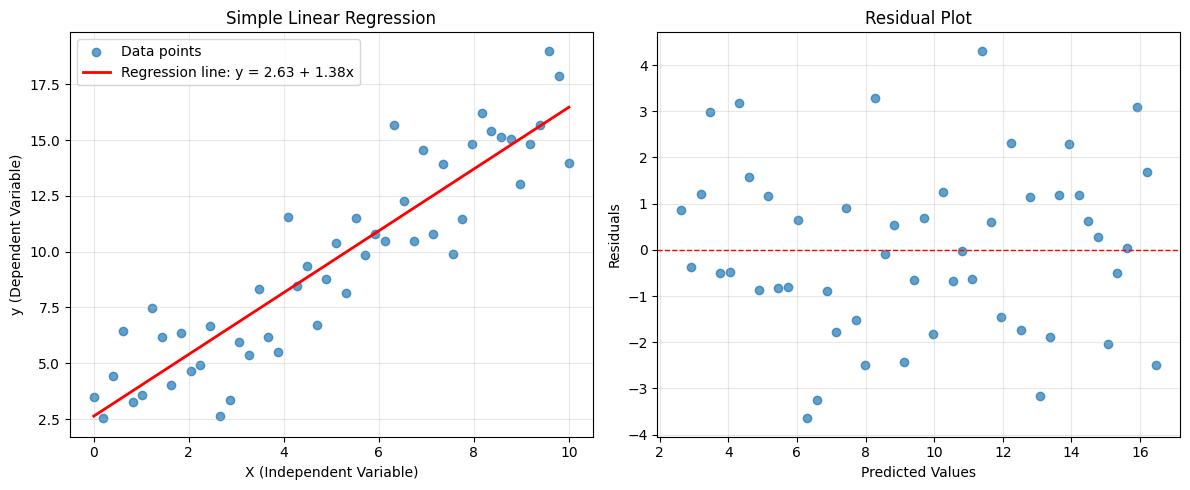


For each additional hour of study, exam score increases by 5.38 points on average
A student who doesn't study at all (0 hours) would score about 46.73 points
Model explains 98.8% of the variance in exam scores

Prediction: Studying for 6.5 hours -> Score: 81.7


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    """Simple Linear Regression Model: y = b0 + b1*x"""
    
    def __init__(self):
        self.b0 = None  # Intercept
        self.b1 = None  # Slope
        self.r_squared = None  # R-squared value
        
    def fit(self, X, y):
        """
        Fit the linear regression model
        
        Parameters:
        X : array-like, independent variable
        y : array-like, dependent variable
        """
        # Convert to numpy arrays for calculation
        X = np.array(X)
        y = np.array(y)
        
        # Calculate means
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate slope (b1)
        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        self.b1 = numerator / denominator
        
        # Calculate intercept (b0)
        self.b0 = y_mean - self.b1 * X_mean
        
        # Calculate R-squared
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y_mean) ** 2)
        self.r_squared = 1 - (ss_res / ss_tot)
        
        return self
    
    def predict(self, X):
        """
        Predict using the linear model
        
        Parameters:
        X : array-like, independent variable
        
        Returns:
        Predicted values
        """
        if self.b0 is None or self.b1 is None:
            raise ValueError("Model must be fitted before making predictions")
        
        return self.b0 + self.b1 * np.array(X)
    
    def get_coefficients(self):
        """Return the model coefficients"""
        return self.b0, self.b1
    
    def get_r_squared(self):
        """Return the R-squared value"""
        return self.r_squared
    
    def summary(self):
        """Print model summary"""
       
        print("SIMPLE LINEAR REGRESSION MODEL")
  
        print(f"Equation: y = {self.b0:.4f} + {self.b1:.4f} * x")
        print(f"Intercept (b0): {self.b0:.4f}")
        print(f"Slope (b1): {self.b1:.4f}")
        print(f"R-squared: {self.r_squared:.4f}")
        


# Example usage with synthetic data
def main():
    # Generate synthetic data
    np.random.seed(42)
    X = np.linspace(0, 10, 50)
    y = 2.5 + 1.5 * X + np.random.normal(0, 2, 50)  # True model: y = 2.5 + 1.5x + noise
    
    # Create and fit the model
    model = SimpleLinearRegression()
    model.fit(X, y)
    
    # Print model summary
    model.summary()
    
    # Make predictions
    X_test = np.array([0, 5, 10, 15])
    y_pred = model.predict(X_test)
    print("\nPredictions:")
    for x_val, y_val in zip(X_test, y_pred):
        print(f"  x = {x_val:5.1f} -> y = {y_val:5.2f}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Data and regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.7, label='Data points')
    
    # Plot regression line
    X_line = np.linspace(min(X), max(X), 100)
    y_line = model.predict(X_line)
    plt.plot(X_line, y_line, color='red', linewidth=2, label=f'Regression line: y = {model.b0:.2f} + {model.b1:.2f}x')
    
    plt.xlabel('X (Independent Variable)')
    plt.ylabel('y (Dependent Variable)')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Residuals
    plt.subplot(1, 2, 2)
    y_pred_all = model.predict(X)
    residuals = y - y_pred_all
    
    plt.scatter(y_pred_all, residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Demonstrate with a real-world example
 
    
    # Sample data: Study hours vs Exam score
    study_hours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    exam_scores = [50, 55, 65, 70, 75, 80, 85, 90, 95, 98]
    
    # Fit model
    model2 = SimpleLinearRegression()
    model2.fit(study_hours, exam_scores)
    
    # Print results
    print(f"\nFor each additional hour of study, exam score increases by {model2.b1:.2f} points on average")
    print(f"A student who doesn't study at all (0 hours) would score about {model2.b0:.2f} points")
    print(f"Model explains {model2.r_squared*100:.1f}% of the variance in exam scores")
    
    # Make a prediction
    study_time = 6.5
    predicted_score = model2.predict([study_time])[0]
    print(f"\nPrediction: Studying for {study_time} hours -> Score: {predicted_score:.1f}")


if __name__ == "__main__":
    main()

In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
# X = independent variable, y = dependent variable
X = np.array([[1], [2], [3], [4], [5]])  # Feature
y = np.array([2, 4, 5, 4, 5])           # Target

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the coefficients
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
